<a href="https://colab.research.google.com/github/yogi21102/churn/blob/main/xgboost_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd # load and manipulate the data and for One- Hot Encoding
import numpy as np #calculate mean and standard deviation
import xgboost as xgb #xgboost stuff
from sklearn.model_selection import train_test_split #split data into training and testing sets
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer # for scoring
from sklearn.model_selection import GridSearchCV #cross validation
from sklearn.metrics import confusion_matrix # creates a confusion matrix
#from sklearn.metrics import plot_confusion_matrix #draws a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay



**when** panda(pd) read data, it returns data frame, which is lot like spreadsheet. The data is organized in rows and columns. The standard variable name for a **data frame** is initials **df** and that we will use here:

In [ ]:
df=pd.read_csv('Telco_customer_churn01.csv')

Now we have have loaded data in df, lets look at first 5 rows using head()

In [ ]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


"..." denotes dataset has more columns or variables, than will print to the screen

In [ ]:
df.drop(['Churn Label','Churn Score','CLTV','Churn Reason'],
        axis=1,inplace=True)
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


Some of other colums only contains single value  and will not be useful for classification

In [ ]:
df['Count'].unique()

array([1])

In [ ]:
df['Country'].unique()

array(['United States'], dtype=object)

In [ ]:
df['State'].unique()

array(['California'], dtype=object)

In [ ]:
df['City'].unique()

array(['Los Angeles', 'Beverly Hills', 'Huntington Park', ..., 'Standish',
       'Tulelake', 'Olympic Valley'], dtype=object)

we will now remove unique value column

In [ ]:
df.drop(['CustomerID', 'Count', 'Country', 'State','Lat Long'],
        axis=1,inplace=True)
df.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


although it is OK to have whitespace, but while building a tree we can't have whitespace. So, lets remove them

In [ ]:
df['City'].replace(' ','_',regex=True , inplace= True)
df.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [ ]:
df['City'].unique()[0:10]

array(['Los_Angeles', 'Beverly_Hills', 'Huntington_Park', 'Lynwood',
       'Marina_Del_Rey', 'Inglewood', 'Santa_Monica', 'Torrance',
       'Whittier', 'La_Habra'], dtype=object)

In [ ]:
df.columns=df.columns.str.replace(' ','_')
df.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


Great!!!! We romved all the data that is not useful for creating effective XGBoost model.
Now, we are ready to identify and deal with **Missing Data**.

**Missing Data Part 1: Identifying Missing Data**

Missing data is simply Blank or NA
One thing is relatively unique in XGBosst is that it has default behavior for missing data. So, all we have to do is identify missing values and make sure they are set to 0.

In [ ]:
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn_Value            int64
dtype: object

lot of columns are object that is okay as we saw lot of YES and NO response.
However, lets verify

In [ ]:
df['Phone_Service'].unique()

array(['Yes', 'No'], dtype=object)

now let's check for every column and I did this. But right now we will focus on specific one that looks like it could be problem: Total_Charges

In [ ]:
df['Total_Charges'].unique()

array(['108.15', '151.65', '820.5', ..., '7362.9', '346.45', '6844.5'],
      dtype=object)

In [ ]:
##NOTE: it is commented as it will generate eeror. But
##the error will let you understand a lot

#df['Total_Charges']=pd.to_numeric(df['Total_Charges'])

**Missing Data Part 2: Dealing with Missing Data, XGBoost style**

Lets see how many rows are having missing data

if there will be lot, we might have problem on our hands that is biiger than what XGBoost can deal with. If less, we can deal with it

In [ ]:
len(df.loc[df['Total_Charges']==' '])

11

Since less, we can deal with it

In [ ]:
df.loc[df['Total_Charges']==' ']

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0


Change with 0 now.

In [ ]:
df.loc[(df['Total_Charges']==' '),'Total_Charges']=0

now let's verify that we modified correctly or not

In [ ]:
df.loc[df['Tenure_Months']==0]

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,0


Great!!!! We have verified

Now let change datatype from object to integer

In [ ]:
df['Total_Charges']=pd.to_numeric(df['Total_Charges'])
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
Churn_Value            int64
dtype: object

Now, we can replace all withspace in columns with underscores
NOTE: We are only doing this so we can draw a picture of one of XGBoost trees.

In [ ]:
df.replace(' ','_',regex=True,inplace=True)
df.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30,1


**Format Data Part 1: Split data into dependent and Independent Variables**

X:used for classification


y:predicted value

In [ ]:
X=df.drop('Churn_Value',axis=1).copy()#alternatively: X=df_no_missing.iloc[:,:-1]
X.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30


In [ ]:
y=df['Churn_Value'].copy()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn_Value, dtype: int64

We are ready to continue formatting X so that it is suitable for making a model with XGBoost

**Format the Data Part 2: One -Hot Encoding**

now we need to take closer look at X, type of data it has(float or categorical).
Xgboost(or many algorithms natively support continuous data.
So, in order to use categorical data we need to use trick to change them into multpile columns of binary values, this trick is called **One-Hot Encoding**.

Let first check categorical data, i have checked and I am showing just data type.

In [ ]:
X.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
dtype: object

Lets see what happens when we convert Payment_Method without saving result, this will make it easy to see how get_dummies() works

In [ ]:
pd.get_dummies(X,columns=['Payment_Method']).head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Monthly_Charges,Total_Charges,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,Month-to-month,Yes,53.85,108.15,False,False,False,True
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,Month-to-month,Yes,70.70,151.65,False,False,True,False
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,Yes,Month-to-month,Yes,99.65,820.50,False,False,True,False
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Month-to-month,Yes,104.80,3046.05,False,False,True,False
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Yes,Month-to-month,Yes,103.70,5036.30,True,False,False,False


Now, we see how get_dummies() works, lets use it on all of categorical columns and save te result

In [ ]:
X_encoded=pd.get_dummies(X,columns=['City',
                                    'Gender',
                                    'Senior_Citizen',
                                    'Partner',
                                    'Dependents',
                                    'Phone_Service',
                                    'Multiple_Lines',
                                    'Internet_Service',
                                    'Online_Security',
                                    'Online_Backup',
                                    'Device_Protection',
                                    'Tech_Support',
                                    'Streaming_TV',
                                    'Streaming_Movies',
                                    'Contract',
                                    'Paperless_Billing',
                                    'Payment_Method'])
X_encoded.head()

,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,City_Acampo,City_Acton,City_Adelanto,City_Adin,...,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,90003,33.964131,-118.272783,2,53.85,108.15,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True
1,90005,34.059281,-118.307420,2,70.70,151.65,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
2,90006,34.048013,-118.293953,8,99.65,820.50,False,False,False,False,...,True,True,False,False,False,True,False,False,True,False
3,90010,34.062125,-118.315709,28,104.80,3046.05,False,False,False,False,...,True,True,False,False,False,True,False,False,True,False
4,90015,34.039224,-118.266293,49,103.70,5036.30,False,False,False,False,...,True,True,False,False,False,True,True,False,False,False


Great!!!

Now one last thing beforw we build XGBoost model.Lets verify that y only contains 1s and 0s with unique().

In [ ]:
y.unique()

array([1, 0])

**Build A Preliminary XGBoost Model**

now simply splits data into training and testing.
However, lets first observe that this data is imbalanced

In [ ]:
sum(y)/len(y)

0.2653698707936959

Now split data into training and testing, we will split using stratification in order to maintain same percentage of people in both set

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X_encoded,y, random_state=42,stratify=y)

Now lets verify that using stratify worked as expected....

In [ ]:
sum(y_train)/len(y_train)

0.2654297614539947

In [ ]:
sum(y_test)/len(y_test)

0.26519023282226006

Great!!! stratify worked as expectedand both y_train, y_test have same percentage of people left the company.

Now, Lets build preliminary model

**NOTE:** Instead of determining optimal number of trees with cross validation, we will use **early stopping** to stop building trees when they no longer improve situation.

In [ ]:
clf_xgb= xgb.XGBClassifier(objective='binary:logistic', missing =np.nan,seed=42)

In [ ]:
clf_xgb.fit(X_train,
            y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_test, y_test)])

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-aucpr:0.64135
[1]	validation_0-aucpr:0.65171
[2]	validation_0-aucpr:0.65991
[3]	validation_0-aucpr:0.65350
[4]	validation_0-aucpr:0.65743
[5]	validation_0-aucpr:0.65051
[6]	validation_0-aucpr:0.65827
[7]	validation_0-aucpr:0.65980
[8]	validation_0-aucpr:0.65751
[9]	validation_0-aucpr:0.65389
[10]	validation_0-aucpr:0.65572
[11]	validation_0-aucpr:0.65920
[12]	validation_0-aucpr:0.66010
[13]	validation_0-aucpr:0.65963
[14]	validation_0-aucpr:0.65877
[15]	validation_0-aucpr:0.65791
[16]	validation_0-aucpr:0.65808
[17]	validation_0-aucpr:0.65742
[18]	validation_0-aucpr:0.65770
[19]	validation_0-aucpr:0.65698
[20]	validation_0-aucpr:0.65733
[21]	validation_0-aucpr:0.65646
[22]	validation_0-aucpr:0.65650


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Ok, we have build **XGBoost** model for classification. Lets see how it performs on **Testing Dataset** by running the **Testing Dataset** down the model and drawing **Confusion Matrix**

In [ ]:
predictions = clf_xgb.predict(X_test)
print(predictions)

[0 0 0 ... 0 0 0]


In [ ]:
clf_xgb.classes_

array([0, 1])

In [ ]:
cm=confusion_matrix(y_test,predictions,labels=clf_xgb.classes_)
print(cm)

[[1160  134]
 [ 218  249]]


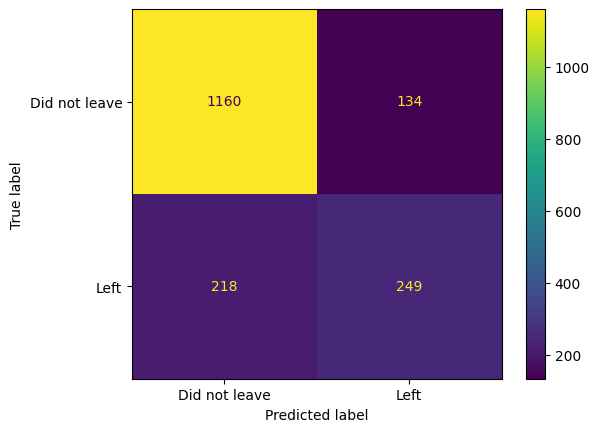

In [ ]:
cm_disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Did not leave","Left"])

cm_disp.plot()

**Optimization Parameters using Cross Validation And GridSearch()**

XGBoost has lot of hyperparameters that we have to manual configure and are not determined by XGBoost itself like max_depth(max tree deapth), learning_rate(learning rate or "eta"), gamma,the parameter that encourages pruning, and reg_lambda(regularization parameter lambda)

So, lets try to find optimal value of these in hope we can improve accuracy with **testing dataset**

NOTE: Since we haave many hyperparameters to optimize, we use GridSearchCV(). We specify bunch of potential values for hyperparametersand GridSearchCV() tests all possible combinations of the parameters for us.

So, after testing all possible combinations of potential parameters values with Cross Validation, we set values for parameter
gamma=0.25, learn_rate=0.1, max_depth=4 and reg_lambda=10

**Building, Evaluating, Drawing, and Interpreting the Optimized XGBoost Model**

Now we have ideal parameter values, we can build final XGBoost model:

In [ ]:
# NOTE: When data are imbalanced, XGBoost manual says...
# If you care only about overall performance metric(AUC) OF YOUR PREDICTION
#     Balance +ve and -ve weight via scale_pos_weight
#     Use AUC for Evaluation
# Also note I ran GridSearchCV Sequentially on subsets of parameteroptions,
#rather than all at in order tp optimize parameters in short period of time.

In [ ]:
##Round 1
param_grid={
    'max_depth': [3,4,5],
    'learning_rate':[0.1,0.01,0.05],
    'gamma': [0,0.25,1.0],
    'reg_lambda': [0,1.0,10.0],
    'scale_pos_weight': [1,3,5]
}
#NOTE: XGBoost recommends sum(negative_instances)/sum(positive_instances)

In [ ]:
# Because learning_rate and reg_lambda were at ends of their ranges, we
#will coninue to explore

In [ ]:
#Round2
param_grid={
    'max_depth': [4],
    'learning_rate':[0.1,0.5,1],
    'gamma': [0.25],
    'reg_lambda': [10.0,20,100],
    'scale_pos_weight': [3]
}

In [ ]:
#Note: To speed up cross validation and to further prevent overfitting.
#we are only using random subset of data(90%) and are only
# using a random subset of features(columns) (50%) per tree


In [ ]:
optimal_params= GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic',
                               seed=42,
                               subsample=0.9,
                               colsample_bytree=0.5),
    param_grid=param_grid,
    scoring='roc_auc',
    verbose=0, # NOTE: If you want to see what Grid Search is doing, set verbose=2
    n_jobs=10,
    cv=3
)

In [ ]:
optimal_params.fit(X_train,
                  y_train,
                  early_stopping_rounds=10,
                  eval_metric='auc',
                  eval_set=[(X_test,y_test)],
                   verbose=False
                  )
print(optimal_params.best_params_)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


{'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 4, 'reg_lambda': 20, 'scale_pos_weight': 3}


In [ ]:
clf_xgb=xgb.XGBClassifier(seed=42,
                          objective='binary:logistic',
                          gamma=0.25,
                          learn_rate=0.1,
                          max_depth=4,
                          reg_lambda=10,
                          scale_pos_weight=3,
                          subsample=0.9,
                          colsample_bytree=0.5)
clf_xgb.fit(X_train,
            y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_test,y_test)])

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-aucpr:0.55601
[1]	validation_0-aucpr:0.60550
[2]	validation_0-aucpr:0.62214
[3]	validation_0-aucpr:0.61940


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:02:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "learn_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[4]	validation_0-aucpr:0.62052
[5]	validation_0-aucpr:0.64715
[6]	validation_0-aucpr:0.64955
[7]	validation_0-aucpr:0.65161
[8]	validation_0-aucpr:0.64729
[9]	validation_0-aucpr:0.65593
[10]	validation_0-aucpr:0.66075
[11]	validation_0-aucpr:0.65730
[12]	validation_0-aucpr:0.66035
[13]	validation_0-aucpr:0.66148
[14]	validation_0-aucpr:0.66036
[15]	validation_0-aucpr:0.66169
[16]	validation_0-aucpr:0.65855
[17]	validation_0-aucpr:0.66112
[18]	validation_0-aucpr:0.66009
[19]	validation_0-aucpr:0.66341
[20]	validation_0-aucpr:0.66290
[21]	validation_0-aucpr:0.66314
[22]	validation_0-aucpr:0.66093
[23]	validation_0-aucpr:0.66109
[24]	validation_0-aucpr:0.66059
[25]	validation_0-aucpr:0.65994
[26]	validation_0-aucpr:0.65956
[27]	validation_0-aucpr:0.65730
[28]	validation_0-aucpr:0.66026


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.25, grow_policy=None, importance_type=None,
              interaction_constraints=None, learn_rate=0.1, learning_rate=None,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

Now lets draw another confusion matrix to see if optimized XGBoost model does better

In [ ]:
predictions1 = clf_xgb.predict(X_test)
print(predictions1)

[0 0 0 ... 0 0 1]


In [ ]:
clf_xgb.classes_

array([0, 1])

In [ ]:
cm=confusion_matrix(y_test,predictions1,labels=clf_xgb.classes_)
print(cm)

[[947 347]
 [ 81 386]]


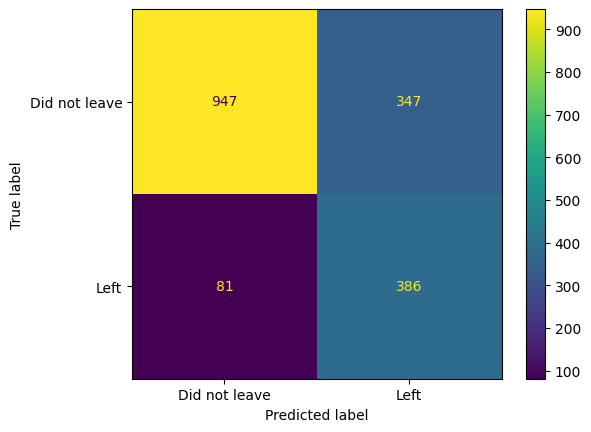

In [ ]:
cm_disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Did not leave","Left"])

cm_disp.plot()

now it does some better 51% to 84%(left the company), but made did not leave bad

last thing we are going to draw first XGBoostTree and discuss how to interpret it

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:04:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "learn_rate" } are not used.

  warnings.warn(smsg, UserWarning)


weight:  {'Zip_Code': 1.0, 'Longitude': 1.0, 'Monthly_Charges': 2.0, 'City_Running_Springs': 1.0, 'Dependents_Yes': 3.0, 'Internet_Service_Fiber_optic': 1.0, 'Online_Security_No': 3.0, 'Contract_Month-to-month': 1.0, 'Contract_One_year': 1.0}
gain:  {'Zip_Code': 71.41329193115234, 'Longitude': 9.660177230834961, 'Monthly_Charges': 63.86188507080078, 'City_Running_Springs': 14.2515869140625, 'Dependents_Yes': 73.40862274169922, 'Internet_Service_Fiber_optic': 272.9932861328125, 'Online_Security_No': 39.27902603149414, 'Contract_Month-to-month': 1645.472412109375, 'Contract_One_year': 29.85206413269043}
cover:  {'Zip_Code': 50.16840744018555, 'Longitude': 210.90699768066406, 'Monthly_Charges': 349.9308776855469, 'City_Running_Springs': 329.7137756347656, 'Dependents_Yes': 389.6995544433594, 'Internet_Service_Fiber_optic': 1207.5361328125, 'Online_Security_No': 528.6401977539062, 'Contract_Month-to-month': 1808.5587158203125, 'Contract_One_year': 139.02389526367188}
total_gain:  {'Zip_Cod

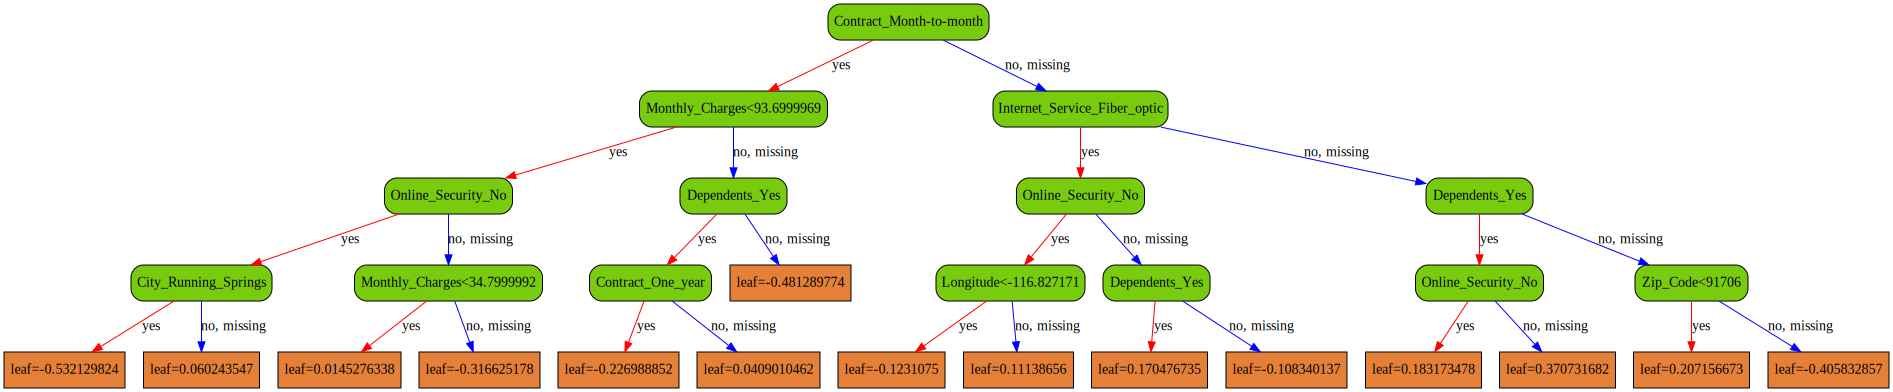

In [ ]:
##If we want to get info, like gain and cover etc, at each node in first tree,
##we just build the first tree, otherwise we'll get the average over all of trees.
clf_xgb=xgb.XGBClassifier(seed=42,
                          objective='binary:logistic',
                          gamma=0.25,
                          learn_rate=0.1,
                          max_depth=4,
                          reg_lambda=10,
                          scale_pos_weight=3,
                          subsample=0.9,
                          colsample_bytree=0.5,
                          n_estimators=1)##we set this to 1 so that we can get gain,cover etc
clf_xgb.fit(X_train,y_train)
#now print out weight, gain,cover etc for tree
#weight= no. of times a feature is used in branch or root across all trees
#gain=average gain across all splits that feature is used in
#cover=average coverage across all splits feature is used in
#total_gain=total gain across all splits that feature is used in
#total_cover=total coverage across all splits feature is used in
#NOTE: Since we only built one tree, gain=total_gain and cover=total_cover
bst= clf_xgb.get_booster()
for importance_type in('weight','gain','cover','total_gain','total_cover'):
  print('%s: ' % importance_type, bst.get_score(importance_type=importance_type))

node_params= {'shape': 'box',## make the nodes fancy
              'style': 'filled,rounded',
              'fillcolor': '#78cbe'}
leaf_params={'shape': 'box',
              'style': 'filled',
             'fillcolor': '#e48038'}

#NOTE: num_trees is Not number of trees to plot, but specific tree you want to plot
#The default value is 0, but i am setting it just to show it in action since it is
#counter-intuitive
#xgb.to_graphviz(clf_xgb,num_tree=0,size="10,10")
xgb.to_graphviz(clf_xgb,num_trees=0, size="10,10",
                condition_node_params=node_params,
                leaf_node_params=leaf_params)
#if you want to save figure...
#graph_data=xgb.to_graphviz(clf_xgb,num_trees=0, size="10,10",
#                condition_node_params=node_params,
#               leaf_node_params=leaf_params)
#graph_data.view(filename='xgboost_tree_customer_churn')##save as PDF